# Dealing with Missing Data - Lab

## Introduction

In this lab, we'll work through strategies for data cleaning and dealing with missing values (`NaN`s).

## Objectives
In this lab you will:

- Identify missing values in a dataframe using built-in methods 
- Explain why missing values are a problem in data science 

## Dataset

In this lab, we'll continue working with the _Titanic Survivors_ dataset, which can be found in `'titanic.csv'`.

Before we can get going, we'll need to import the usual libraries.  In the cell below, import:
* `pandas` as `pd`
* `numpy` as `np`
* `matplotlib.pyplot` as `plt`
* set `%matplotlib inline`

In [1]:
pip install missingno

Note: you may need to restart the kernel to use updated packages.


In [2]:
# Import necessary libraries below
import pandas as pd
import numpy as np
import missingno as msno 
import matplotlib.pyplot as plt
%matplotlib inline

Now, let's get started by reading in the data from the `'titanic.csv'` file and storing it the DataFrame `df`. Subsequently, be sure to preview the data.

In [3]:
# Use pandas to load the csv file
df = pd.read_csv('titanic.csv')
df.head()


,Unnamed: 0,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## Find missing values in a DataFrame

Before we can deal with missing values, we first need to find them. There are several easy ways to detect them.  We will start by answering very general questions, such as "does this DataFrame contain any null values?", and then narrowing our focus each time the answer to a question is "yes".

We'll start by checking to see if the DataFrame contains **any** missing values (NaNs) at all. 

**_Hint_**: If you do this correctly, it will require method chaining, and will return a boolean value for each column.  

In [4]:
#
df.isna().any()

Unnamed: 0     False
PassengerId    False
Survived       False
Pclass         False
Name           False
Sex            False
Age             True
SibSp          False
Parch          False
Ticket         False
Fare           False
Cabin           True
Embarked        True
dtype: bool

Now we know which columns contain missing values, but not how many. 

In the cell below, chain a different method with `isna()` to check how many total missing values are in each column.  

Expected Output:

```
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64
```

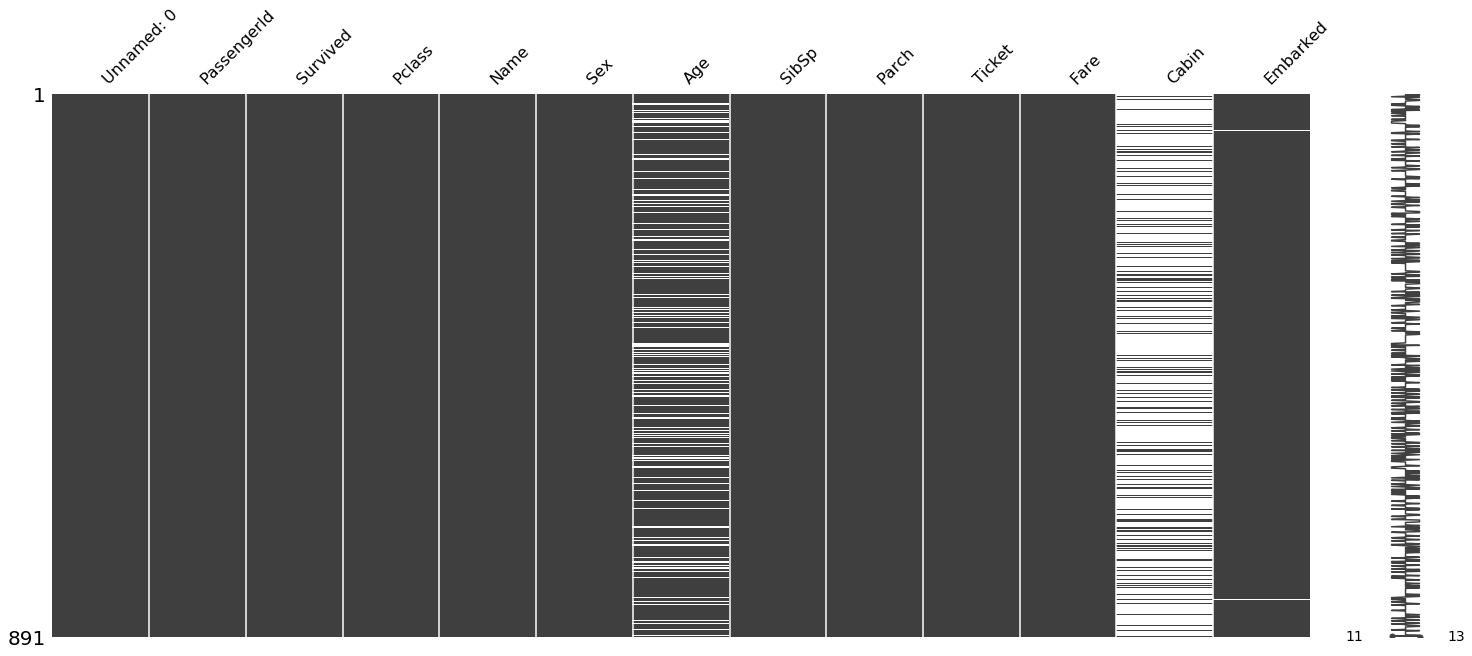

In [5]:
msno.matrix(df)

In [6]:
df.isna().sum()

Unnamed: 0       0
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

Now that we know how many missing values exist in each column, we can make some decisions about how to deal with them.  

We'll deal with each column individually, and employ a different strategy for each.  


### Dropping the column

The first column we'll deal with is the `Cabin` column.  We'll begin by examining this column more closely. 


In the cell below:
* Determine what percentage of rows in this column contain missing values
* Print out the number of unique values in this column

In [7]:
df[df.Cabin.isna()]

,Unnamed: 0,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
7,7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...,...
884,884,885,0,3,"Sutehall, Mr. Henry Jr",male,25.0,0,0,SOTON/OQ 392076,7.0500,NaN,S
885,885,886,0,3,"Rice, Mrs. William (Margaret Norton)",female,39.0,0,5,382652,29.1250,NaN,Q
886,886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
888,888,889,0,?,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S


In [8]:
len(df[df.Cabin.isna()])/ len(df)

0.7710437710437711

In [9]:
df['Cabin'].isna().sum()/len(df)

0.7710437710437711

In [10]:
# Your code here
len(df['Cabin'].value_counts())

147

In [11]:
df['Cabin'].nunique()

147

With this many missing values, it's probably best for us to just drop this column completely.

In the cell below:

* Drop the `Cabin` column in place from the `df` DataFrame
* Then, check the remaining number of null values in the dataset by using the code you wrote previously   

In [12]:
df = df.drop('Cabin', axis = 1)

In [13]:
df.isna().sum()

Unnamed: 0       0
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Embarked         2
dtype: int64

### Computing placeholder values

Recall that another common strategy for dealing with missing values is to replace them with the mean or median for that column. We'll begin by investigating the current version of the `'Age'` column.  

In the cell below:

* Plot a histogram of values in the `'Age'` column with 80 bins (1 for each year)    
* Print out the mean and median for the column   

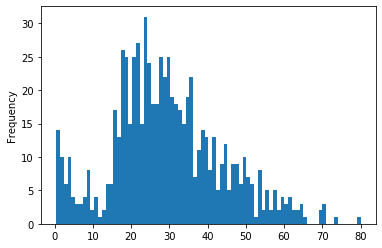

In [14]:
df['Age'].plot(kind='hist', bins=80)

In [15]:
df['Age'].mean()

29.69911764705882

In [16]:
df['Age'].median()

28.0

From the visualization above, we can see the data has a slightly positive skew. 

In the cell below, replace all missing values in the `'Age'` column with the median of the column.  **Do not hard code this value -- use the methods from pandas or numpy to make this easier!**  Do this replacement in place on the DataFrame. 

In [17]:
df['Age'] = df['Age'].fillna(df['Age'].median())


In [18]:
df['Age'].head(10)

0    22.0
1    38.0
2    26.0
3    35.0
4    35.0
5    28.0
6    54.0
7     2.0
8    27.0
9    14.0
Name: Age, dtype: float64

Now that we've replaced the values in the `'Age'` column, let's confirm that they've been replaced.  

In the cell below, check how many null values remain in the dataset.  

In [19]:
df['Age'].isna().sum()


0

Great! Now we need to deal with the two pesky missing values in the `'Embarked'` column.  

### Dropping rows that contain missing values

Perhaps the most common solution to dealing with missing values is to simply drop any rows that contain them.  Of course, this is only a good idea if the number dropped does not constitute a significant portion of our dataset.  Often, you'll need to make the overall determination to see if dropping the values is an acceptable loss, or if it is a better idea to just drop an offending column (e.g. the `'Cabin'` column) or to impute placeholder values instead.

In the cell below, use the appropriate built-in DataFrame method to drop the rows containing missing values. Do this in place on the DataFrame.  

In [20]:
df = df.dropna()

In [21]:
df.isna().sum()

Unnamed: 0     0
PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

Great! We've dealt with all the **_obvious_** missing values, but we should also take some time to make sure that there aren't symbols or numbers included that are meant to denote a missing value. 

### Missing values with placeholders

A common thing to see when working with datasets is missing values denoted with a preassigned code or symbol.  Let's check to ensure that each categorical column contains only what we expect.

In the cell below, return the unique values in the `'Embarked'`, `'Sex'`, `'Pclass'`, and `'Survived'` columns to ensure that there are no values in there that we don't understand or can't account for.  

In [22]:
df['Embarked'].unique()

array(['S', 'C', 'Q'], dtype=object)

In [23]:
df['Embarked'].value_counts(normalize = True)

S    0.724409
C    0.188976
Q    0.086614
Name: Embarked, dtype: float64

In [24]:
df['Sex'].unique()

array(['male', 'female'], dtype=object)

In [25]:
df['Sex'].value_counts(normalize = True)

male      0.649044
female    0.350956
Name: Sex, dtype: float64

In [26]:
df['Pclass'].unique()

array(['3', '1', '2', '?'], dtype=object)

In [27]:
df['Pclass'].value_counts(normalize = True)

3    0.527559
1    0.224972
2    0.193476
?    0.053993
Name: Pclass, dtype: float64

In [28]:
df['Survived'].unique()

array([0, 1])

In [29]:
df['Survived'].value_counts(normalize = True)

0    0.617548
1    0.382452
Name: Survived, dtype: float64

It looks like the `'Pclass'` column contains some missing values denoted by a placeholder! 

In the cell below, investigate how many placeholder values this column contains.  Then, deal with these missing values using whichever strategy you believe is most appropriate in this case.  

In [30]:
df['Pclass'].value_counts()


3    469
1    200
2    172
?     48
Name: Pclass, dtype: int64

In [31]:
df['Pclass'].value_counts().mean()

222.25

In [32]:
df['Pclass'].value_counts().median()

186.0

In [33]:
#Impute values using random method
rel_prob = [.53, .33, .19]
prob = [i/sum(rel_prob) for i in rel_prob]
def impute_pclass(value):
    if value == '?':
        return np.random.choice(['3','1','2'], p= prob )
    else:
        return value
df['Pclass'] = df['Pclass'].map(lambda x: impute_pclass(x))
df['Pclass'].value_counts(normalize = True)

3    0.555681
1    0.240720
2    0.203600
Name: Pclass, dtype: float64

**_Question:_** What is the benefit of treating missing values as a separate valid category?  What is the benefit of removing or replacing them? What are the drawbacks of each? Finally, which strategy did you choose? Explain your choice below. 

Write your answer below this line:
______________________________________________________________________________________________________
Missing values limits the ability to convert datatypes. 
Chosse random imputation. Very elegant.

Now, let's do a final check to ensure that there are no more missing values remaining in this dataset.  

In the cell below, reuse the code you wrote at the beginning of the notebook to check how many null values our dataset now contains.  

In [34]:
# Your code here
df.isna().sum()

Unnamed: 0     0
PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

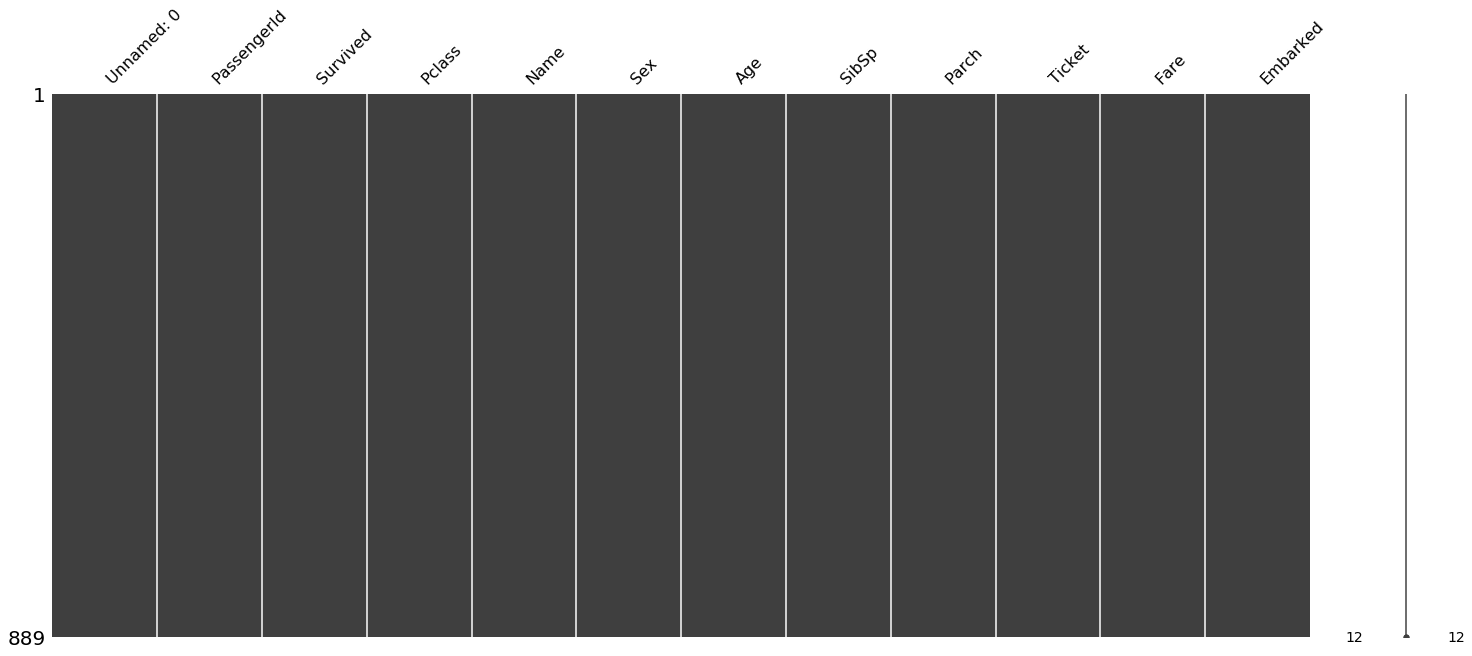

In [35]:
msno.matrix(df)

Great! Those all seem in line with our expectations.  We can confidently say that this dataset contains no pesky missing values that will mess up our analysis later on!

## Summary

In this lab, we learned:
* How to detect missing values in our dataset
* How to deal with missing values by dropping rows
* How to deal with missing values by imputing mean/median values 
* Strategies for detecting missing values encoded with a placeholder